In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.style as style
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import string
%matplotlib inline

style.use('ggplot')

### Read the data from csv

In [2]:
df = pd.read_csv('./Comcast_telecom_complaints_data.csv')
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x,"%d-%m-%y"))

### Datewise analysis on number of complaints

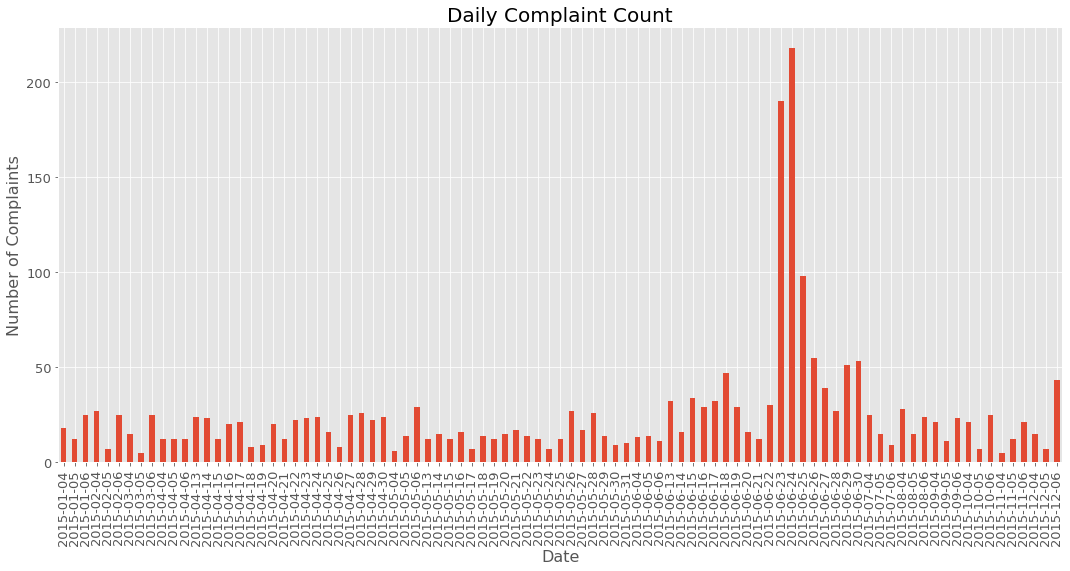

In [3]:
datewise_df = df.groupby(['Date'])
datewise_df.count().sort_values('Date')['Customer Complaint'].plot(kind='bar',rot=90,figsize=(18,8),fontsize=13)
plt.title('Daily Complaint Count',fontdict={'size':20})
plt.ylabel('Number of Complaints',fontdict={'size':16})
plt.xlabel('Date',fontdict={'size':16})
dates = list(map(lambda x: x.strftime("%Y-%m-%d"),datewise_df.groups.keys()))
plt.xticks(ticks = range(len(dates)),labels=dates)
plt.show()

---
##### Only months April, May and June have collected complaints on dates other than 04,05 and 06. 
##### Also we see that on 04,05 and 06 of each month we collect similar number complaints. This could very possibly be some bill related issue that the customer observed during the beginning of the month.
---

### Monthwise analysis on number of complaints

In [ ]:
df['Month'] = df['Date'].apply(lambda x: x.strftime("%m"))
df['Month_name'] = df['Date'].apply(lambda x: x.strftime("%B"))
fig,ax =plt.subplots(figsize=(16,8))
monthly = df.groupby(['Month','Month_name'])
monthly.count()['Customer Complaint'].plot(kind='bar',)
plt.title('Monthly Complaint Count',fontdict={'size':20})
plt.ylabel('Number of Complaints',fontdict={'size':16})
plt.xlabel('Date',fontdict={'size':16})
plt.xticks(ticks = range(12),labels=list(map(lambda x: x[1],list(monthly.groups.keys()))))
plt.show()

---
##### Almost all months except April, May and June have approximately same number of complaints
##### June has an extraordinary increase in complaint count. It has half the total number of complaints.
---

### Statewise analysis on number of open and close complaints

In [ ]:
df['Open_close'] = df['Status'].replace({'Pending':'Open','Solved':'Closed'})

In [ ]:
style.use('seaborn')
fig, ax = plt.subplots()
per_state = df.groupby(['State','Open_close'])
plt.title('Statewise Complaint Count',fontdict={'size':20})
plt.ylabel('Number of Complaints',fontdict={'size':16})
plt.xlabel('State',fontdict={'size':16})

per_state.count()['City'].unstack().fillna(0).plot(kind='bar',stacked=True,figsize=(15,10),ax=ax,cmap="Dark2")
plt.show()

##### Georgia clearly has the highest number of complaints over the year 2015 with nearly 300 complaints followed by Florida and California

### Categorize complaints based on frequent words

In [ ]:
punct = set(string.punctuation)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('comcast')
stemmer = PorterStemmer()
# df['stemmed_and_wo_stopwords'] = df['Customer Complaint'].apply(lambda x:' '.join([stemmer.stem(i) for i in x.lower().split() if i not in stop_words]))
df['stemmed_and_wo_stopwords'] = df['Customer Complaint'].apply(lambda x:' '.join([i for i in x.lower().split() if i not in stop_words]))
df['stemmed_and_wo_stopwords'] = df['stemmed_and_wo_stopwords'].str.replace('[^A-Za-z0-9\s]','')
text = ' '.join(df['stemmed_and_wo_stopwords'].values.tolist())
words = Counter(text.split(),).most_common(30)
words

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
from wordcloud import WordCloud, STOPWORDS 
plt.figure(figsize=(20,10))
wordcloud = WordCloud(width=1600,height=1100,stopwords = STOPWORDS,max_words=30).generate(text) 
plt.imshow(wordcloud)
plt.show()

In [ ]:
selected_words = ['internet','service','billing','data','speed','cap','speeds','charges','throttling','cable']
internet_keywords  = ['internet','data','cap','usage']
billing = ['billing','charges','pay','fees','price']
network = ['speed','throttling','connection','connect','bandwidth','slow']
others = ['cable','service', 'failure','switch','account']

In [ ]:
category_dic = {
    'internet' : internet_keywords,
    'billing' : billing,
    'network' : network,
}

In [ ]:
df['Complaint Category'] = df['Customer Complaint'].str.lower().apply(lambda x : [k for k,v in category_dic.items() for y in x.split() if y in v]).apply(lambda x: x[0] if x else 'others')

In [ ]:
frequency_table = pd.crosstab(df.Status,df['Complaint Category'],margins=True)
frequency_table

In [ ]:
style.use('seaborn')
df[df['Open_close'] == 'Open'].groupby(['State']).count()['Customer Complaint'].plot(kind='bar',figsize=(15,8),fontsize=13)
plt.title('Statewise Open Complaint Count',fontdict={'size':20})
plt.ylabel('Number of Open Complaints',fontdict={'size':16})
plt.xlabel('Date',fontdict={'size':16})
plt.show()

---
##### Georgia has the maximum number of open complaints in 2015 with around 80 unclosed complaints
---

In [ ]:
complaint_by_source = df.groupby(['Received Via','Open_close']).count()
axs = complaint_by_source['Customer Complaint'].unstack().transpose().plot(fontsize=13,figsize=(18,6),kind='pie',subplots=True,**{'explode':[0.03,0.03]}, autopct="%.2f%%")
plt.figtext(.525,.9,'Complaint Source vs Status', fontsize=18, ha='center')
plt.subplots_adjust(wspace=0.1)
plt.show()

In [ ]:
frequency_table = pd.crosstab(df['Received Via'],df['Open_close'],margins=True)
frequency_table

---
##### From the visualizations above we can see that both sources for complaint registration have similar open to close percentages. Therefore we can assume that the source of complaints viz. Internet or Customer care calls have no major effect on how effectively they get resolved bythe end of the year.
---